In [99]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

0.15870990398255372


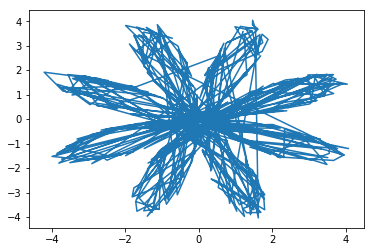

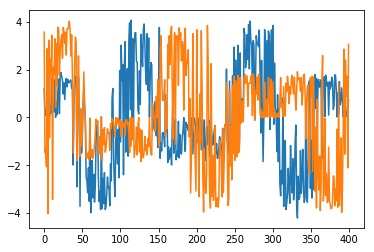

In [100]:
X, Y = load_planar_dataset()
print(X[0,1])

plt.plot(X[0,:],X[1,:])
plt.show()
plt.plot(X[0,:])
plt.plot(X[1,:])

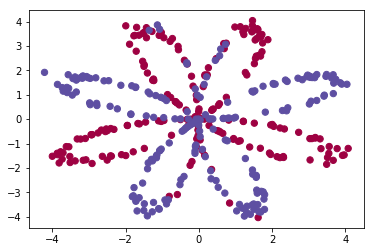

In [101]:
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);
plt.show()
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1] 

In [102]:
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [103]:
def layer_sizes(X, Y):
    n_x = X.shape[0] 
    n_h = 4
    n_y = Y.shape[0] 
    
    return (n_x, n_h, n_y)

In [104]:
clf = sklearn.linear_model.LogisticRegressionCV();

In [105]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)



NotFittedError: This LogisticRegressionCV instance is not fitted yet

In [106]:
X_assess, Y_assess = layer_sizes_test_case()
print(X_assess)
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("Tamaño de la capa de entrada: n_x = " + str(n_x))
print("Tamaño de la capa oculta: n_h = " + str(n_h))
print("Tamaño de la capa de salida: n_y = " + str(n_y))

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
Tamaño de la capa de entrada: n_x = 5
Tamaño de la capa oculta: n_h = 4
Tamaño de la capa de salida: n_y = 2


In [107]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x)* 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [108]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01144724  0.00901591]
 [ 0.00502494  0.00900856]
 [-0.00683728 -0.0012289 ]
 [-0.00935769 -0.00267888]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00530355 -0.00691661 -0.00396754 -0.00687173]]
b2 = [[0.]]


In [109]:
def relu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [110]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X) + b1
    #A1 = np.tanh(Z1)
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [111]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.5 0.5 -1.30506498 0.21331382325160128


In [112]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] 
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = - np.sum(logprobs) * (1 / m) 
    cost = np.squeeze(cost)     
    assert(isinstance(cost, float))
    return cost

In [113]:
A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [114]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2= A2 - Y
    dW2 = 1 / m *(np.dot(dZ2,A1.T))
    db2 = 1 / m *(np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m *(np.dot(dZ1,X.T))
    db1 = 1 / m *(np.sum(dZ1,axis = 1,keepdims = True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [115]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [116]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [117]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [118]:
def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    #llamando al funcion: Inicialize parametros
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
    #llamada a la funcion coste
        cost=compute_cost(A2, Y, parameters)
    #llamado a la funcion back progation
        grads= backward_propagation(parameters, cache, X, Y)
    #llamda de la funcion gradiente decendente parameter update
        parameters = update_parameters(parameters, grads)
    #imprime el costo cada 10000 iteraciones
    return parameters

In [119]:
def predict(parameters,X):
    A2,cache=forward_propagation(X, parameters)
    predictions =np.rint(A2)
    return predictions

In [120]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

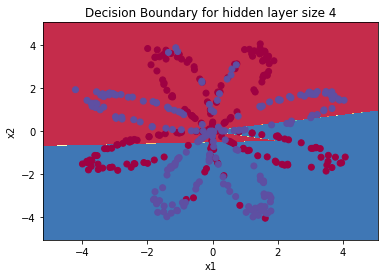

In [121]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
# Plot el límite de decisión
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0]);
plt.title("Decision Boundary for hidden layer size " + str(4))

In [122]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-
predictions.T))/float(Y.size)*100) + '%')

Accuracy: 50%


ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 400, 'y' with size 400.

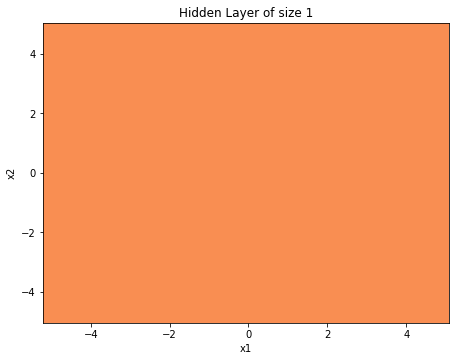

In [124]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

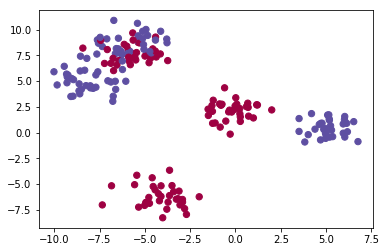

In [125]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles
           }


dataset = "blobs"
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])
# make blobs binary
if dataset == "blobs":
    Y = Y%2
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);
